<img src="https://justaklikaway.files.wordpress.com/2014/05/shut-up-and-take-my-money.jpg" height="400" width="400"> 

# <center> ML для маркетинга. <br>  <br> Сюжетная арка 1: продажи </center>

В этом семестре мы с вами пройдём через несколько сюжетных арок. Первой такой аркой будут продажи. Им будет посвящена первая серия из домашек и семинаров. 


### Задача:

Мы будем работать с датасетом __bikes_rent.csv__, в котором по дням записаны календарная информация и погодные условия, характеризующие автоматизированные пункты проката велосипедов, а также число прокатов в этот день. Последнее мы будем предсказывать; таким образом, мы будем решать задачу регрессии.


##  Эпизод I (скрытые зависимости) 

В этом эпизоде мы с вами попробуем сделать предобработку данных, чтобы потом можно было отважно обучать на них модели.

__Важные нюансы:__ 

* Вы должны не просто выполнить все задания из этой домашки, вы должны выполнить их добросовестно. Дальше вы будете пытаться оценивать модели на том датасете, который здесь изобретёте. Если вы его изобретёте плохо, то вы завалите автоматически и вторую домашку. Переделывать его мы не разрешим. Все проблемы, которые возникнут у вас с данными в следущей части домашки, вам придётся исправлять прямо в ней. 

* Если вы словами не будете в блокноте прописывать свои выводы, полные баллы вы за пункты получать не будете! 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('bikes_rent.csv')
df.head( )

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


__Описание пееменных:__

* `season`  1 - весна, 2 - лето, 3 - осень, 4 - зима
* `yr`  0 - 2011, 1 - 2012
* `mnth`  от 1 до 12
* `holiday`  0 - нет праздника, 1 - есть праздник
* `weekday`  от 0 до 6
* `workingday`  0 - нерабочий день, 1 - рабочий день
* `weathersit`  оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
* `temp`  температура в Цельсиях
* `atemp`  температура по ощущениям в Цельсиях
* `hum`  влажность
* `windspeed(mph)`  скорость ветра в милях в час
* `windspeed(ms)`  скорость ветра в метрах в секунду
* `cnt`  количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

In [3]:
# пакеты для картиночек 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')  # правильный (наиболее красивый) стиль у графиков

%matplotlib inline

## 1. Глазеем на данные и целевую переменную

__[0.5]__ Что в данных с пропусками? 

In [4]:
df.isnull().sum()

season            0
yr                0
mnth              0
holiday           0
weekday           0
workingday        0
weathersit        0
temp              0
atemp             0
hum               0
windspeed(mph)    0
windspeed(ms)     0
cnt               0
dtype: int64

__Ответ:__  пропусков нет, возрадуемся!

__[0.5]__ Составьте список из категориальных переменных и список из действительных переменных.

In [5]:
# категориальные переменные 
var_cat = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# непрерывные переменные
var_real = ['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)']

target = 'cnt'

__[0.5]__ Нарисуйте гистограмму для целевого признака. Что можете сказать о его хвосте? Надо ли предпринять какие-нибудь манипуляции, связанные с борьбой с выбросами? 

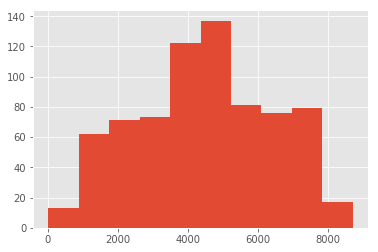

In [6]:
df[target].hist();

__Ответ:__  у распределения нет длинного хвоста, выбросов не наблюдается. 

__[1]__ Давайте посмотрим на то, как переменные коррелируют с таргетом. Для этого постройте соответствующую облака рассеивания. 

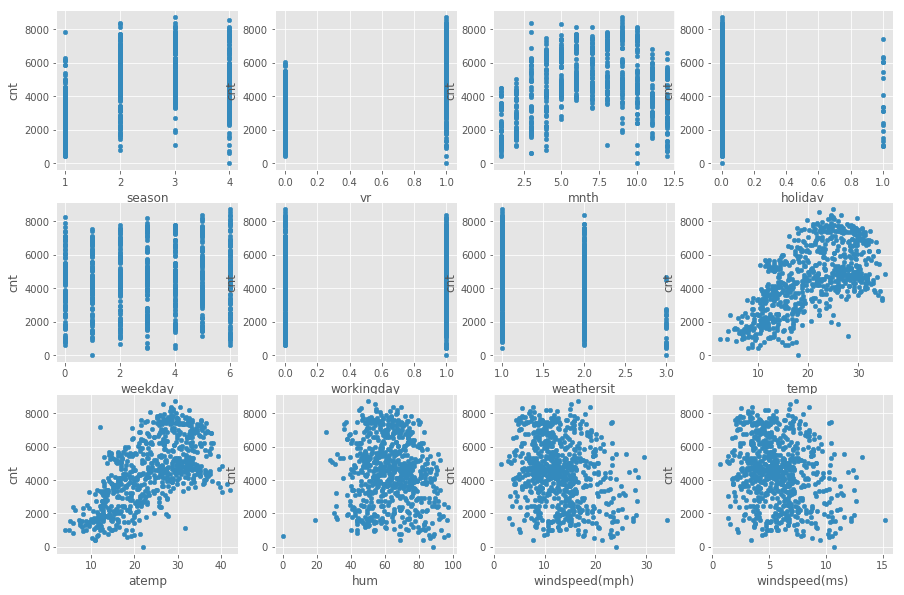

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

for idx, feature in enumerate(df.columns[:-1]):
    df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

__[0.5]__ Каков характер зависимости числа прокатов от месяца? От каких признаков спрос зависит линейно? 

__Ответ:__ Квадратичный. От температуры линейно. Явно видно по графику. 

## 2. Непрерывные переменные 

__[0.5]__ Постройте гистограммы для всех непрерывных переменных. Что можете сказать о выбросах? 

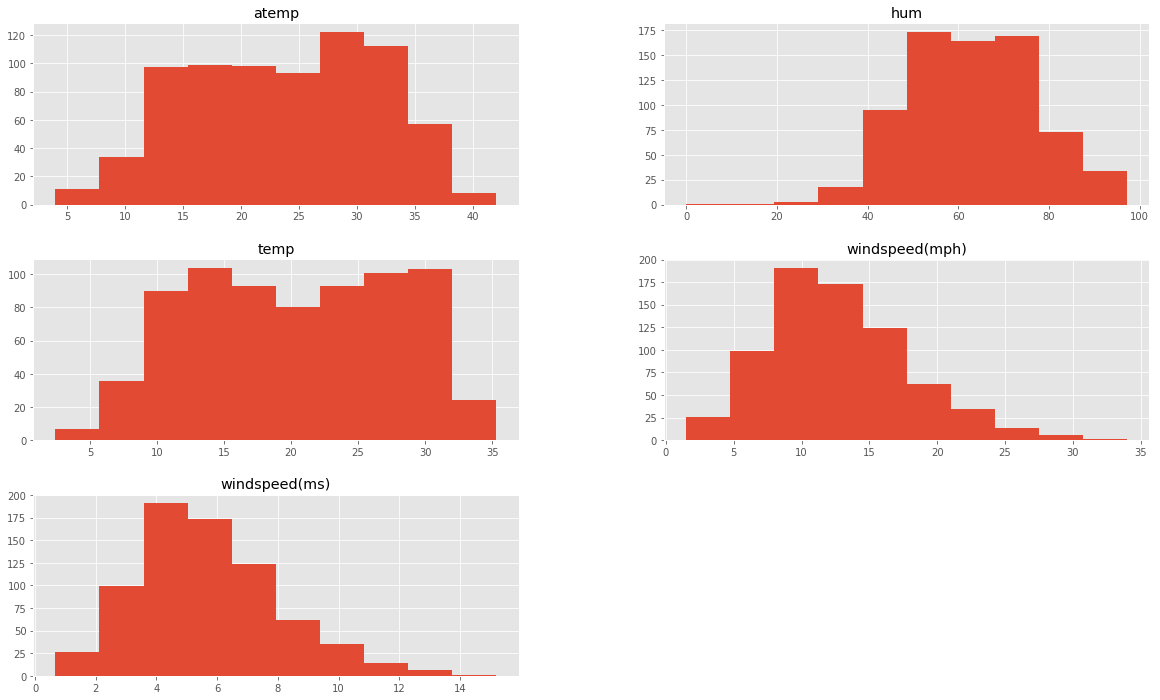

In [8]:
df[var_real].hist(figsize=(20, 12));

__Ответ:__  Вроде бы всё хорошо. 

__[1]__ Постройте между непрерывными признаками корреляционную матрицу. Нарисуйте её. Какие признаки, скорее всего, неинформативны? Почему они на ваш взгляд такие? 

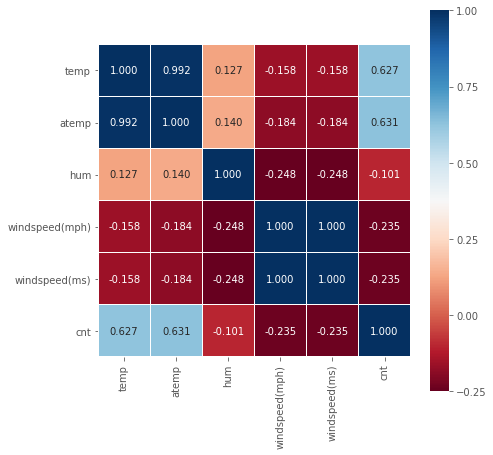

In [9]:
plt.figure(figsize=(7,7))
corr = df[var_real + [target]].corr()  # посчитали корреляции между регрессорами

# рисуем корреляционную матрицу
sns.heatmap(corr, annot=True, square=True, fmt=".3f", linewidths=0.1, cmap="RdBu")

__Ответ:__ У нас есть два разных измерения температуры и два разных измерения скорости ветра. Надо будет избавиться от дублей. В них одинаковая информация. Из-за этого эти признаки немнформативны.

## 3. Предобработка категориальных признаков 

__[0.5]__ Постройте для всех категориальных переменных _countplot_. Что интересного вы видите в распределеии этих признаков?  Встречаются ли слишком обширные категории, в которых очень маленькие части нам придётся объединять в категорию "другое"? 

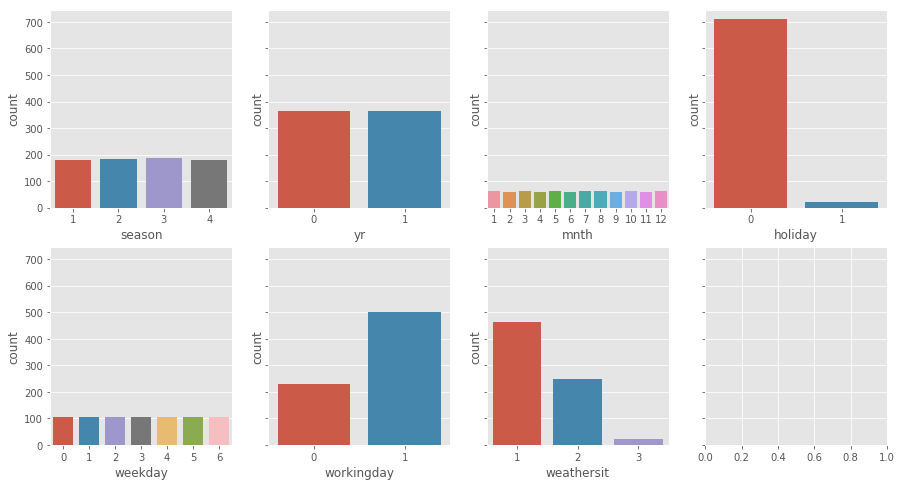

In [10]:
fig, axes = plt.subplots(2, 4, figsize=(15, 8), sharey=True)

for i in range(len(var_cat)):
    sns.countplot(x=var_cat[i], data=df, ax=axes[i // 4, i % 4])

__Ответ:__  Данные, собранные по велисипедам равномерно размазаны во времени. Это хорошо, потому что нет перекоса к какому-то одному конкретному сезону года. Больших категорий нет. Есть категория праздники, где в $1$ попадает довольно мало наблюдений, но это к лучшему, так как поможет отрезать дни с аномальным спросом (выбросы). 

__[1]__  Сделайте OHE-кодирование. Сколько свежих OHE-признаков у нас появилось? 

In [11]:
df[var_cat] = df[var_cat].astype(str)  # чтобы все категории стали object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
season            731 non-null object
yr                731 non-null object
mnth              731 non-null object
holiday           731 non-null object
weekday           731 non-null object
workingday        731 non-null object
weathersit        731 non-null object
temp              731 non-null float64
atemp             731 non-null float64
hum               731 non-null float64
windspeed(mph)    731 non-null float64
windspeed(ms)     731 non-null float64
cnt               731 non-null int64
dtypes: float64(5), int64(1), object(7)
memory usage: 74.3+ KB


In [12]:
dff = pd.get_dummies(df, drop_first=True, dummy_na=False)
dff.head()

,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt,season_2,season_3,season_4,yr_1,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
0,14.110847,18.18125,80.5833,10.749882,4.805490,985,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,14.902598,17.68695,69.6087,16.652113,7.443949,801,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,8.050924,9.47025,43.7273,16.636703,7.437060,1349,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,8.200000,10.60610,59.0435,10.739832,4.800998,1562,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,9.305237,11.46350,43.6957,12.522300,5.597810,1600,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [13]:
dff.shape

(731, 31)

## 4. Варка новых признаков 

__[1]__   Некоторые из наших переменных могут вносить в спрос на велики квадратичный вклад. Например, температура. 

Сначала, когда температура возрастает, люди выходят кататься охотнее, а потом, когда становится жарко, спрос резко падает. Так возникает параболическая зависимость. 

Создайте для каждой действительной переменной из данных дополнительную переменную: её квадрат. 

In [14]:
for var in var_real:
    dff[var + '_sq'] = dff[var]**2

__[1]__  Попробуйте придумать ещё какую-нибудь новую фичу (дополнительную переменную) для прогнозирования. Опишите какая за вашей фичёй стоит интуиция и почему это должно сработать при моделировании.

In [16]:
# Давайте создадим переменную, которая будет отвечать за очень-очень хорошую погоду
#
# Буду считать, что температура между 15 и 25 - хорошо 
# Скорость ветра от 4 до 8 - не слишком сильный, но и не духота
# weathersit = 1, то есть день ясный и чистый

In [15]:
super_nice_day = (15 <= dff['temp']) & (dff['temp'] <= 25)& \
    (4 <= dff['windspeed(ms)'])& (dff['windspeed(ms)'] <= 8)& \
    (dff['weathersit_2'] == 0)&(dff['weathersit_3'] == 0)

sum(super_nice_day) # сколько таких дней 

81

In [16]:
dff.shape[0] # всего дней

731

In [17]:
dff['super_nice_day'] = super_nice_day

## 5. Главные компоненты 

__[2]__ Давайте обучим на наших данных метод главных компонент и возьмём в качестве дополнительных фичей эти главные компоненты. 

In [18]:
from sklearn.decomposition import PCA
model_pca = PCA(n_components= 10)
model_pca.fit(dff.drop(target, axis=1))

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

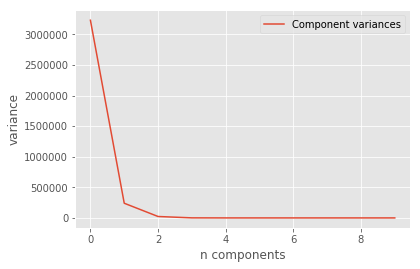

In [19]:
plt.plot(model_pca.explained_variance_, label='Component variances')
plt.xlabel('n components')
plt.ylabel('variance')
plt.legend(loc='upper right');

In [20]:
dff_pca = model_pca.transform(dff.drop(target, axis=1))
dff_pca.shape

(731, 10)

In [21]:
# Забираем первые две компоненты к себе в датасет
dff['pca_1'] = dff_pca[:,0]
dff['pca_2'] = dff_pca[:,1]
dff['pca_3'] = dff_pca[:,3]

__[0]__  Разрезаем данные на две части и сохраняем их на компьютер. Дальше мы будем использовать их при решении новых домашек. Последние 120 наблюдений из таблички заберите в тест. Всё, что идёт до, в обучение. 

In [22]:
dff.shape

(731, 40)

In [23]:
dff[-120:].to_csv('data_test.csv', sep='\t', index=None)

In [24]:
dff[:120].to_csv('data_train.csv', sep='\t', index=None)